<span style='font-size:xx-large'>**Problem 7**</span>


In [2]:
# Define the variables
var('x y')

# Define the objective function 
profit = 42*x + 30*y

# Define the constraints
constraints = [
    x + y <= 100,        
    3*x + 2*y <= 241,    
    x >= 20,             
    x >= 0,              
    y >= 0               
]

# Solve the linear program
p = MixedIntegerLinearProgram(maximization=True)
x_var = p.new_variable()

# Set the objective
p.set_objective(42*x_var[0] + 30)


In [3]:
# Define the linear program
p = MixedIntegerLinearProgram(maximization=True)
x = p.new_variable(real=True)  

# Set the objective function
p.set_objective(42 * x[0] + 30 * x[1])

# Add the constraints
p.add_constraint(x[0] + x[1] <= 100)    
p.add_constraint(3 * x[0] + 2 * x[1] <= 241) 
p.add_constraint(x[0] >= 20)            
p.add_constraint(x[0] >= 0)           
p.add_constraint(x[1] >= 0)

# Solve the problem
max_profit = p.solve()
solution = p.get_values(x)

# Display the result
print(f"Maximum Profit: {max_profit:.2f} euros")
print(f"Acres of Wheat (x): {solution[0]:.2f}")
print(f"Acres of Corn  (y): {solution[1]:.2f}")



Maximum Profit: 3492.00 euros
Acres of Wheat (x): 41.00
Acres of Corn  (y): 59.00


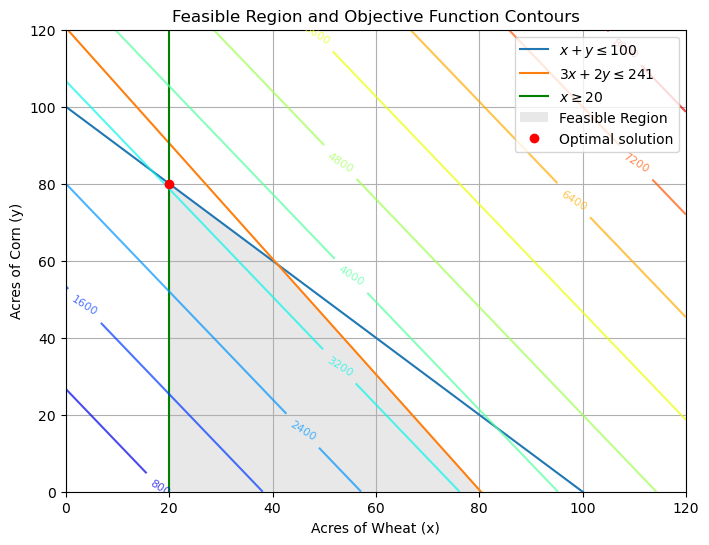

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the feasible region constraints
x_vals = np.linspace(0, 120, 400)
y1 = 100 - x_vals
y2 = (241 - 3 * x_vals) / 2
y3 = np.maximum(0, np.zeros_like(x_vals))  # y >= 0
x_min = 20

# Prepare figure
plt.figure(figsize=(8, 6))

# Plot constraints lines
plt.plot(x_vals, y1, label=r'$x + y \leq 100$')
plt.plot(x_vals, y2, label=r'$3x + 2y \leq 241$')
plt.axvline(x=x_min, color='green', label=r'$x \geq 20$')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)

# Fill feasible region
# Find vertices of the feasible polygon
from shapely.geometry import Polygon, LineString, Point

lines = [
    LineString([(0, 100), (100, 0)]),            # x + y = 100
    LineString([(0, 120.5), (80.3, 0)]),         # 3x + 2y = 241
    LineString([(20, 0), (20, 150)]),            # x = 20
    LineString([(0, 0), (120, 0)]),              # y = 0
]

# Intersect all half-planes defined by constraints
poly_pts = []
for x0 in [20, 80, 0, 100]:
    for y0 in [0, 100, 120.5]:
        pt = Point(x0, y0)
        if (
            x0 + y0 <= 100 + 1e-7 and
            3 * x0 + 2 * y0 <= 241 + 1e-7 and
            x0 >= 20 - 1e-7 and
            y0 >= -1e-7
        ):
            poly_pts.append((x0, y0))

# Add intersections of lines
def line_intersection(a1,b1,c1,a2,b2,c2):
    # Solve a1*x + b1*y = c1 and a2*x + b2*y = c2
    d = a1*b2 - a2*b1
    if abs(d) < 1e-12:
        return None
    x = (c1*b2 - c2*b1)/d
    y = (a1*c2 - a2*c1)/d
    return (x,y)

ints = []
# Between x+y=100 and 3x+2y=241
ints.append(line_intersection(1,1,100,3,2,241))
# Between x+y=100 and x=20
ints.append((20, 100-20))
# Between 3x+2y=241 and x=20
yval = (241 - 3*20)/2
ints.append((20, yval))
# Between x=20 and y=0
ints.append((20, 0))
# Between x+y=100 and y=0
ints.append((100,0))
# Between 3x+2y=241 and y=0
ints.append((241/3,0))

# Filter valid points
for pt in ints:
    if (pt is not None
        and pt[0] >= 20 - 1e-7
        and pt[1] >= -1e-7
        and pt[0] + pt[1] <= 100 + 1e-7
        and 3*pt[0] + 2*pt[1] <= 241 + 1e-7):
        poly_pts.append(pt)

# Remove duplicates and sort polygon points (convex hull)
from scipy.spatial import ConvexHull
import numpy as np

poly_np = np.array(poly_pts)
hull = ConvexHull(poly_np)
hull_pts = poly_np[hull.vertices]

plt.fill(hull_pts[:,0], hull_pts[:,1], 'lightgrey', alpha=0.5, label='Feasible Region')

# Plot objective function contours
profit_func = lambda x, y: 42*x + 30*y
X, Y = np.meshgrid(np.linspace(0,120,200), np.linspace(0,120,200))
Z = profit_func(X, Y)
contours = plt.contour(X, Y, Z, levels=10, cmap='jet', alpha=0.7)
plt.clabel(contours, inline=True, fontsize=8)

# Plot the optimal solution
plt.plot(solution[0], solution[1], 'ro', label='Optimal solution')

plt.xlim(0, 120)
plt.ylim(0, 120)
plt.xlabel('Acres of Wheat (x)')
plt.ylabel('Acres of Corn (y)')
plt.title('Feasible Region and Objective Function Contours')
plt.legend()
plt.grid(True)
plt.show()

<span style='font-size:xx-large'>**Problem 8**</span>


In [12]:
# Declare variables
var('x y')

# Define the function
f = 2*x^2 - 1.05*x^4 + (x^6)/6 + x*y + y^2

# Compute the gradient (∇f)
grad_f = [diff(f, x), diff(f, y)]

# Solve the system ∇f = (0, 0)
stationary_points = solve([grad_f[0] == 0, grad_f[1] == 0], x, y, algorithm='sympy')

# Display results
print("Stationary points:")
for pt in stationary_points:
    print(pt)


Stationary points:
{x: -1.74755234583029, y: 0.873776172915144}
{x: -1.07054229182366, y: 0.535271145911830}
{x: 0.000000000000000, y: 0.000000000000000}
{x: 1.07054229182366, y: -0.535271145911830}
{x: 1.74755234583029, y: -0.873776172915144}


In [13]:
# Determine the nature of each stationary point

# Compute the Hessian matrix of f
H = matrix([[diff(diff(f, x), x), diff(diff(f, x), y)],
            [diff(diff(f, y), x), diff(diff(f, y), y)]])

print("Nature of each stationary point:")
for pt in stationary_points:
    x_val = pt[x]
    y_val = pt[y]
    H_val = H.subs({x: x_val, y: y_val})
    eigvals = H_val.eigenvalues()
    
    if all(ev > 0 for ev in eigvals):
        nature = "Minimum"
    elif all(ev < 0 for ev in eigvals):
        nature = "Maximum"
    else:
        nature = "Saddle point"
    
    print(f"Point {pt}: {nature}")

Nature of each stationary point:


Point {x: -1.74755234583029, y: 0.873776172915144}: Minimum
Point {x: -1.07054229182366, y: 0.535271145911830}: Saddle point
Point {x: 0.000000000000000, y: 0.000000000000000}: Minimum
Point {x: 1.07054229182366, y: -0.535271145911830}: Saddle point
Point {x: 1.74755234583029, y: -0.873776172915144}: Minimum


In [14]:
# Find the global minimum among the stationary points by evaluating f
min_value = +oo
min_point = None
for pt in stationary_points:
    val = f.subs(pt).n()
    if val < min_value:
        min_value = val
        min_point = pt

print(f"Global minimum value: {min_value} at point {min_point}")

Global minimum value: 0.000000000000000 at point {x: 0.000000000000000, y: 0.000000000000000}


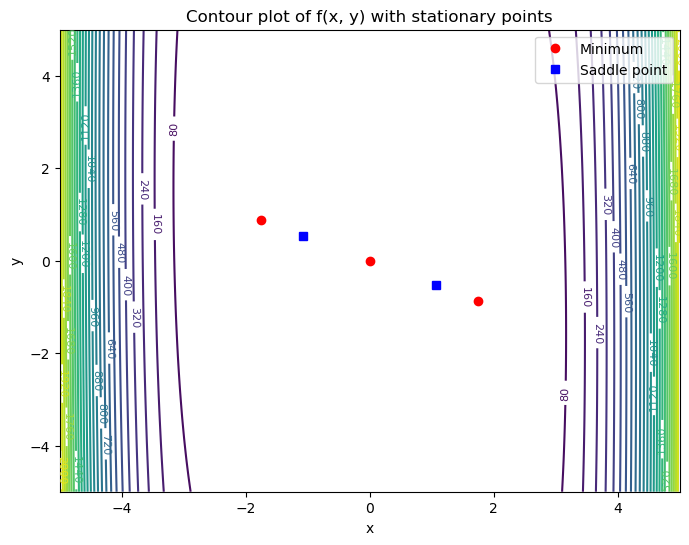

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function for numerical evaluation
f_numeric = lambda x, y: f(x=x, y=y).n()

# Generate a grid for plotting
x_vals = np.linspace(-5, 5, 300)
y_vals = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.vectorize(f_numeric)(X, Y)

# Plot contour
plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

# Mark minima and saddle points
for pt in stationary_points:
    x_val = pt[x].n()
    y_val = pt[y].n()
    H_val = H.subs({x: x_val, y: y_val})
    eigvals = H_val.eigenvalues()

    if all(ev > 0 for ev in eigvals):
        plt.plot(x_val, y_val, 'ro', label='Minimum' if 'Minimum' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif any(ev < 0 for ev in eigvals) and any(ev > 0 for ev in eigvals):
        plt.plot(x_val, y_val, 'bs', label='Saddle point' if 'Saddle point' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of f(x, y) with stationary points')
plt.legend()
plt.show()

In [24]:
from scipy.optimize import minimize

# Define a wrapper to count function calls
class FunctionCounter:
    def __init__(self, func):
        self.func = func
        self.calls = 0
    def __call__(self, xy):
        self.calls += 1
        return float(self.func(x=xy[0], y=xy[1]).n())

# Starting point
x0 = [1, 1]

# Function and gradient definitions
f_counter = FunctionCounter(f)
grad_f = lambda xy: vector([f.diff(x).subs(x=xy[0], y=xy[1]).n(), f.diff(y).subs(x=xy[0], y=xy[1]).n()])

# Optimization using derivative-based method (BFGS)
f_counter.calls = 0
res_bfgs = minimize(f_counter, x0, method='BFGS', jac=grad_f)
calls_bfgs = f_counter.calls

# Optimization using derivative-free method (Nelder-Mead)
f_counter.calls = 0
res_nm = minimize(f_counter, x0, method='Nelder-Mead')
calls_nm = f_counter.calls

# Display results
print(f"BFGS: minimum at {res_bfgs.x}, function calls = {calls_bfgs}")
print(f"Nelder-Mead: minimum at {res_nm.x}, function calls = {calls_nm}")

BFGS: minimum at [ 1.04302353e-06 -3.88681843e-07], function calls = 10
Nelder-Mead: minimum at [ 1.74756595 -0.87377622], function calls = 80
